Name: Kara Eckley

Labpartner(s): Dwight Capus

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import sklearn

# Class 13.1 (And 13.2? Let's see how long this takes...)

#### Announcements

- Reminder **no labs will be accepted after 4/18.** After this you all will be working on your final projects. Please review the syllabus on BB for grading policies. 
- For the next two weeks we will have virtual workdays from 2-4PM, and you will submit your programming and a weekly project planning and assessment form.
- If there is a topic you all are excited about for Wed, let me know


# Warmups 13.1

Standard error (SE), aslo called root mean squre error (RMSE), is a measure of how "off" the model is from the data, and is calculated as the squared sum of the difference between the model and the data, divided by the number of data points, then the squre root is taken:

###   SE = $ \sqrt{\frac {\Sigma ( y_{data}-y_{model} )^2}{N}} $

where $y_{data}$ is the data to be fit by a model, $y_{model}$ is the model prediction, N is the number of data points. $\Sigma$ denotes a sum over all the data points. See https://onlinestatbook.com/2/regression/accuracy.html for more info

**W.1** Revisit the linear fit for the Boston housing data set (Lab 10.2), where you did the linear model of housing price vs. number of rooms and also lower status of the population. Compare and contrast the correlation, p values, and standard error for these two linear models. How does the standard error inform your decition as to which variable is a better predictor of housing value? 


In [3]:
from sklearn import datasets
data = datasets.load_boston()

In [4]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
# convert the data set into a pandas data frame  
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [6]:
# create a second dataframe that has MEDV in it so we can look at correlation`
df2 = df
df2['MEDV'] = target.MEDV

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["RM"],target["MEDV"])

In [8]:
slope

9.102108981180306

In [9]:
intercept

-34.67062077643854

In [10]:
r_value

0.695359947071539

In [11]:
p_value

2.487228871008377e-74

In [12]:
std_err

0.41902656012134054

In [13]:
np.corrcoef(df["RM"], target["MEDV"])

array([[1.        , 0.69535995],
       [0.69535995, 1.        ]])

In [14]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["LSTAT"],target["MEDV"])

In [15]:
slope

-0.9500493537579909

In [16]:
intercept

34.55384087938311

In [17]:
r_value

-0.7376627261740147

In [18]:
p_value

5.081103394388519e-88

In [19]:
std_err

0.03873341621263944

In [20]:
np.corrcoef(df["LSTAT"], target["MEDV"])

array([[ 1.        , -0.73766273],
       [-0.73766273,  1.        ]])

Compare and contrast the correlation, p values, and standard error for these two linear models. How does the standard error inform your decition as to which variable is a better predictor of housing value? 

Correlation is slightly larger for LSTAT, at -0.74 compared to 0.70 for RM. P-value is also large for LSTAT as it is *10**-88 whereas RM is only *10**-74, though both are very far beyond the 0.5 required for significant results. And standard error is much smaller for LSTAT at 0.03 compared to 0.41 for RM. This suggests that LSTAT is a better predictor of housing value than RM.

**W.2** Using the statsmodels package, add a second variable to your model, so that you are fitting the equation:

$ MEDV = a*RM + b*LSTAT +c$


In [21]:
# didn't really work out - now skipping
import statsmodels.api as sm

In [22]:
X = df[['RM', 'LSTAT']]
y = target["MEDV"]
x = sm.add_constant(X)

In [23]:
# Note y, the target of what we are fitting to, goes first:
model = sm.OLS(y, X).fit()

# this is fitting y = aX, with no constant, i.e. using an intercept of zero

In [24]:
model.params

RM       4.906906
LSTAT   -0.655740
dtype: float64

In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.948
Method:                 Least Squares   F-statistic:                              4637.
Date:                Wed, 14 Apr 2021   Prob (F-statistic):                        0.00
Time:                        13:51:32   Log-Likelihood:                         -1582.9
No. Observations:                 506   AIC:                                      3170.
Df Residuals:                     504   BIC:                                      3178.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9069      0.070     69.906      0.000       4.769       5.045
LSTAT         -0.6557      0.031    -21.458      0.000      -0.716      -0.596
==============================================================================
Omnibus:                      145.153   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              442.157
Skew:                           1.351   Prob(JB):                     9.70e-97
Kurtosis:                       6.698   Cond. No.                         4.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
predictions = model.predict(X)

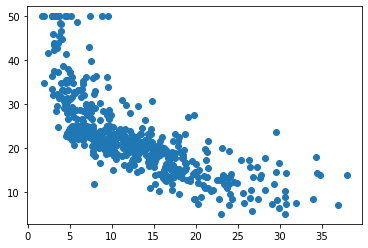

In [27]:
plt.plot()
plt.scatter(df["LSTAT"], target["MEDV"])

**W.3** Is this a more predictive model of housing value? Explain.



I'm not so sure it worked, but it probably would be if it did because it took more variables into account and therefore may have been able to account for more variation in the data, resulting in a higher R value. Even so, ignoring the graph and looking at the model output, the standard error is below 0.1 for both RM and LSTAT and the model has an R**2 of 0.948 which is great so maybe that part worked out just fine.

**W.4** What are the values of a and b? What do they mean in this context? 

They are different constants, like slope and intercept. Very similar to m and b in the y = mx + b equation.

# Lecture 13.1

## Agenda:
- Machine Learning in Scikit learn

## Introduction

Machine Learning has emerged as an important tool accross the scientific diciplines and in many business applications. The most commonly used package for machine learning is scikit-learn, which we will play around with this week.

There are a number of types of machine learning algorithms, aka "estimators". A useful flowchart:
https://scikit-learn.org/stable/tutorial/machine_learning_map/

These can be divided up into:

1) Regression. This involves finding the best fit parameters for some model, like with did with linear models.

2) Clustering, which groups data by some similarity criterion (e.g., these data points are grass, these are trees, and these are water because of their spectral data differences). See https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

3) Dimensionality reduction, which breaks data, often timesries data, into principle components. For example if we were looking at a temperature timeseries, we might get as components an annual cycle, a daily cycle, and a multi-year cycle corresponding to ENSO (El Nino - Southern Oscillation), etc.

4) Classification. This uses labeled data to make preditions about what will happen in places you don't have data, for example in this area it is expected to see large green birds and not small red birds, and in another area it is expected to see both types. We will focus on this today.

See also: https://scikit-learn.org/stable/tutorial/basic/tutorial.html



## Classification example from scikit-learn
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py

Here is the whole code below. We are going to break this example down

C:\Users\Kara\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kara\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Kara\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


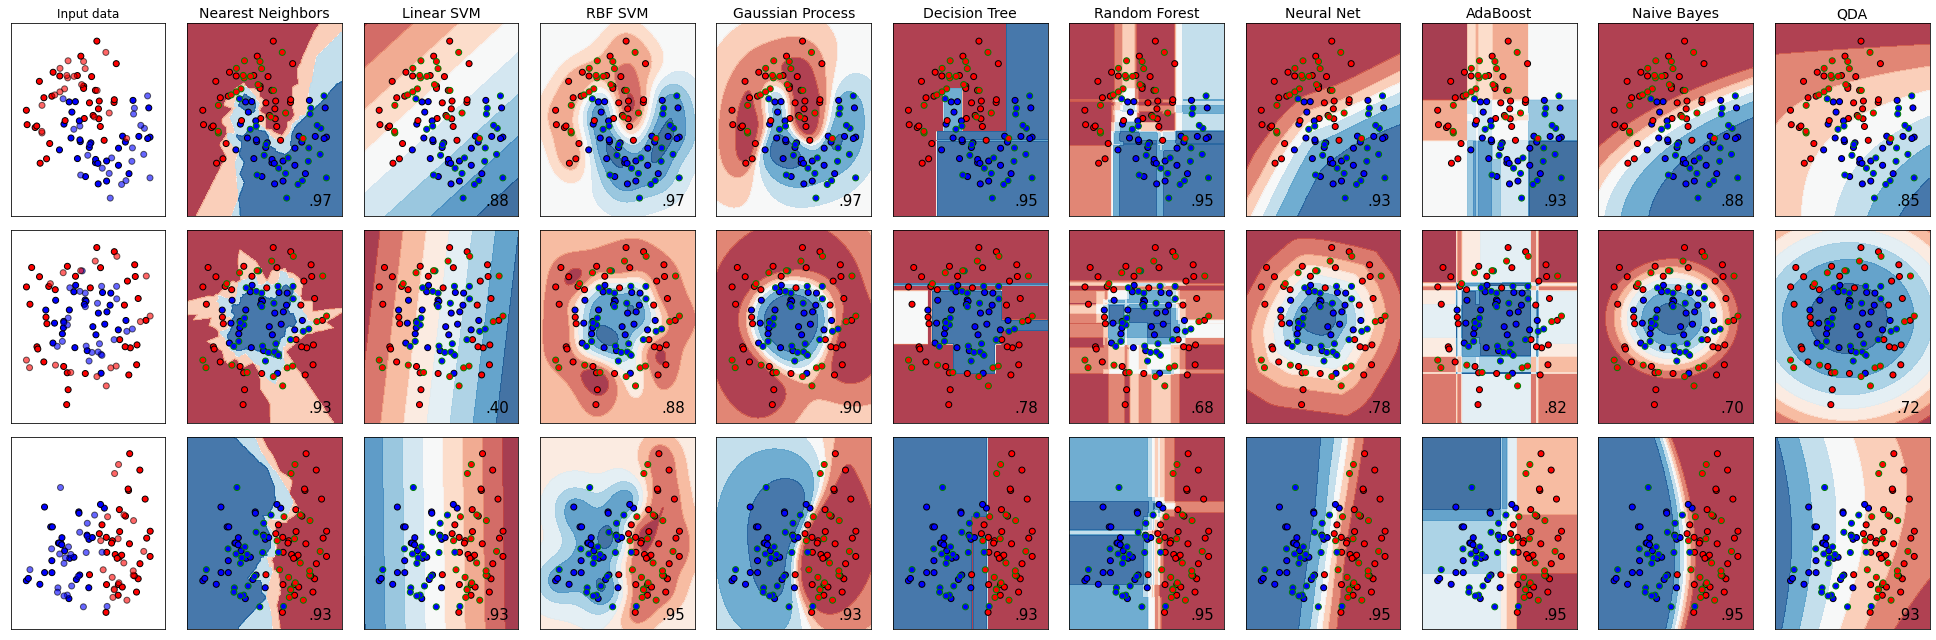

In [28]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9), facecolor = 'w')
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='green', alpha=1, zorder = 10)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name, fontsize = 14)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()

# Step by step

### Load all the packages in

Note they do this for each package separately


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# data and pre-proccessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

# all the classifiers we will use:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



In [30]:
h = .02  # step size in the mesh

# create a string list of all the cassifier names
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [31]:
# create a function list of all the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

## Part 1: Make some datasets to classify

The example uses three types of data, linearly separable, moons and circles

### Data 1. Linearly separable (side by side data)

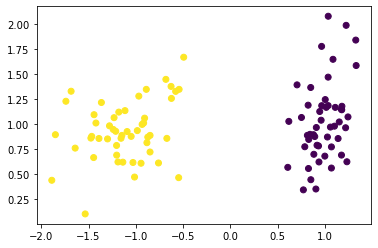

In [32]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

plt.scatter(X[:,0],X[:,1], c= y)

In [72]:
# add som noise to these so they smoosh together
X_old = np.copy(X)
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

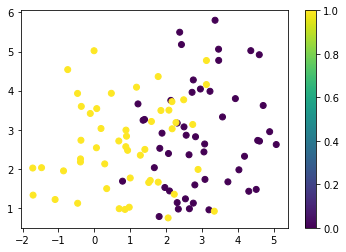

In [73]:
plt.scatter(X_old[:,0],X_old[:,1], c = y)
plt.colorbar()

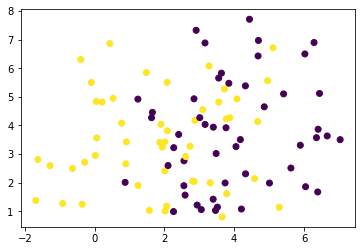

In [74]:
plt.scatter(X[:,0],X[:,1], c = y)

### E1. What happens if you use X_old = X instead of X_old = np.copy(X)?

In [69]:
# add som noise to these so they smoosh together
X_old = X
# make a random number object
rng = np.random.RandomState(2)
# add some random numbers to the data
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

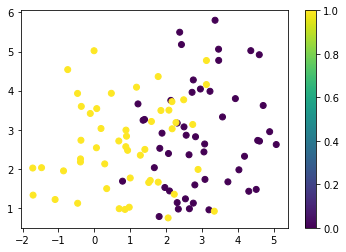

In [70]:
plt.scatter(X_old[:,0],X_old[:,1], c = y)
plt.colorbar()

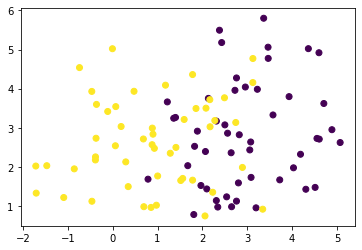

In [71]:
plt.scatter(X[:,0],X[:,1], c = y)

The data end up overlapping rather than just squished together. I would guess this would make clustering more difficult later on.

### Data 2. Moons

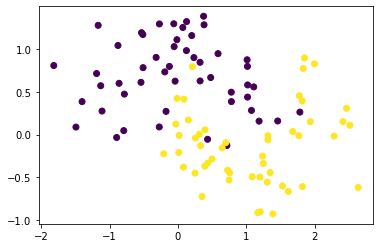

In [75]:
X,y = make_moons(noise=0.3, random_state=10)
plt.scatter(X[:,0],X[:,1], c = y)

### E2. What happens to the make_moons data if you change the noise and random state? Why do you think they picked noise = 0.3?

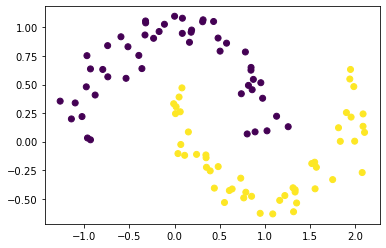

In [80]:
X,y = make_moons(noise=0.1, random_state=10)
plt.scatter(X[:,0],X[:,1], c = y)

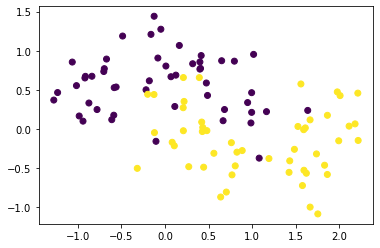

In [86]:
X,y = make_moons(noise=0.3, random_state=70)
plt.scatter(X[:,0],X[:,1], c = y)

In [ ]:
#Increasing noise seems to bring the data closer together in their moon shapes whereas decreasing separates it. Changing the random state seems to affect the shape/scatter/distriibution of the moon, but not so much where it is or how much they're overlapping.

### Data 3. Circles

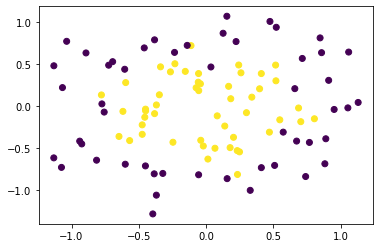

In [87]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.5, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

### E3. Play around with the options for make_circles. What does factor do?

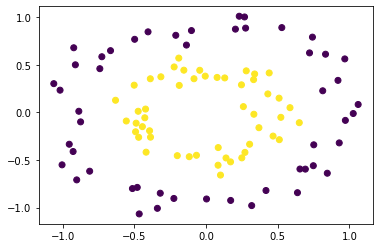

In [89]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.1, factor=0.5, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

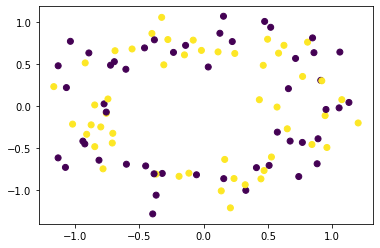

In [93]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.9, random_state=1)

plt.scatter(X[:,0],X[:,1], c= y)

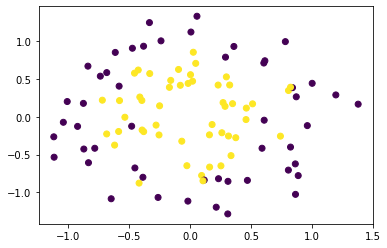

In [97]:
# make some data to play with (this is from sklearn.datasets, loaded above)
X, y = make_circles(noise=0.2, factor=0.5, random_state=5)

plt.scatter(X[:,0],X[:,1], c= y)

In [ ]:
#Noise again impacts how separated the clusters are, and factor seems to affect this as well with a larger value having the data overlapping. Again, random state seems to affect the scatter, but doesn't really alter the shape or overall distribution of the clusters.

In [105]:
# put the three types of datasets together in one array
datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

## Part 2: Big double for loop

The next part of the code has a double for loop that:

    Loops over the datasets
    # iterate over datasets
    for ds_cnt, ds in enumerate(datasets):
    
        Loops over the classifiers
        # iterate over classifiers
        for name, clf in zip(names, classifiers):
        
        
Let's break this down, and start with one dataset and apply a number of classifiers to it

### Using first dataset (moons) and first estimator

#### FIrst we preproccess
preprocess dataset, split into training and test part

scale the data

In [121]:
# get the first dataset, which is moons
x, y = datasets[0]

# scale the data by the mean and standard deviation, i.e. z = (x - u) / s, 
# where x is the data, u is the mean, and s is the standard deviation
# see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = StandardScaler().fit_transform(x)


### E4 make a plot with two subplots, showing the scaled and unscaled data next to each other. How are they different?

Text(0.5, 1.0, 'Scaled')

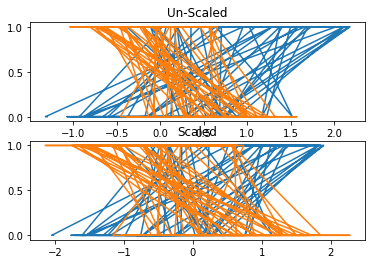

In [122]:
#The scale on the x axis changes. It's larger on the scaled data.

fig, axs = plt.subplots(2)
axs[0].plot(x, y)
axs[1].plot(X, y)
axs[0].set_title("Un-Scaled")
axs[1].set_title("Scaled")

In [110]:
# split the data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)


In [111]:
y_train # color

array([0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [112]:
X_train #position

array([[ 0.30920485, -0.127041  ],
       [-0.48691402,  0.57259859],
       [ 0.50954902, -1.66427178],
       [ 1.35242892,  0.60859541],
       [ 1.89600064, -0.42653506],
       [ 0.74779523,  0.54957438],
       [-1.19805934,  1.40047603],
       [-1.4065875 , -1.03687185],
       [-0.33075371, -0.55325533],
       [ 0.81773837,  1.64300265],
       [-1.30667592, -0.60711187],
       [-0.62663858, -0.45097084],
       [-0.22120141,  1.00868763],
       [-0.85151619, -0.06022663],
       [-0.59739923,  0.27829883],
       [ 0.15581821, -1.14573741],
       [ 0.07813527,  0.18433247],
       [ 0.24130156, -1.74371889],
       [-0.42443599,  1.30854456],
       [ 0.0081454 , -0.58656254],
       [ 0.03138162,  1.27867747],
       [-2.02716273, -0.07552655],
       [-0.20216417,  0.09829492],
       [-1.77093289, -0.15602456],
       [ 1.01975478, -0.39964896],
       [ 1.22467352, -1.45537741],
       [ 0.19895122,  2.27694191],
       [ 0.27524467,  0.58976897],
       [-0.9843448 ,

### E5 What percentage of the data is used for training here?

In [ ]:
#40% will be used for training, 60% reserved for testing.

### plot the data

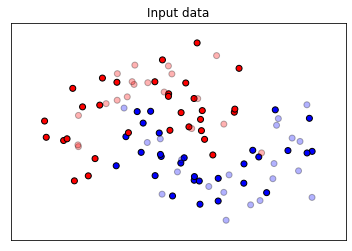

In [113]:
#######
# set up a meshgrid for plotting the classification result based on the size of the dataset
# note this will be used later
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#######

# counter for which subplot we are in
i = 1

# this counter is used to know when to plot the title
ds_cnt = 0

# just plot the dataset first

# note this is not used yet
cm = plt.cm.RdBu

# set the colormap used for the data 
# see https://matplotlib.org/tutorials/colors/colorbar_only.html#sphx-glr-tutorials-colors-colorbar-only-py
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1,1, i)
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# if the first row, plot the title
if ds_cnt == 0:
    ax.set_title("Input data")
    
# Plot the training points using the bright colormap
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
           edgecolors='k')

# set the limits to the colormap min max we will use later
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# get rid of ticks
ax.set_xticks(())
ax.set_yticks(())

# increment to go to the next subplot
i += 1


Note the testing data is the more transparent set, and the training data is darker

Now we are ready to apply classifiers

Remember we are doing the following:

classifiers = [

    KNeighborsClassifier(3),
    
    SVC(kernel="linear", C=0.025),
    
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    
    DecisionTreeClassifier(max_depth=5),
    
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    
    MLPClassifier(alpha=1),
    
    AdaBoostClassifier(),
    
    GaussianNB(),
    
    QuadraticDiscriminantAnalysis()]

## Nearest neighbors
Basically this method looks at k number of nearest neighbors, using some distance metric, and predicts which class a point is in based on the type of thing those neighbors are.

intro https://www.python-course.eu/k_nearest_neighbor_classifier.php

see https://scikit-learn.org/stable/modules/neighbors.html

and https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

actual help files:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [114]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[0]
clf = classifiers[0]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [115]:
name

'Nearest Neighbors'

In [116]:
clf

# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

KNeighborsClassifier(n_neighbors=3)

In [117]:
score

0.975

Next we will plot the decision boundary using the mesh we generated. Basically this is asking, for each point on the plane, which group would I be in, red or blue?

In [118]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

### E6 what does the xx.ravel() bit of code do?

In [ ]:
#The ravel function is used to turn a 2- or multi-dimensional array into a flattened one-dimensional array.

Note that kneighbors does not have a decision_function, so we are using predict_proba. This is the probability that each point in the meshgrid is in either the red class (zeros) or the blue class (ones)

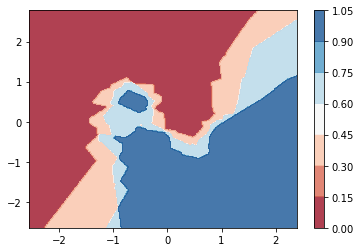

In [119]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

### E7 what do the light blue and peach colors represent?


In [ ]:
#Those are areas which have lower probabilities, but that are guessed to be red (peach) or blue (light blue). On the color bar, you can see that these regions represent probabilities between 0.45 and 0.30 for peach and 0.75 and 0.60 for light blue.

Now we will add in the training and testing points, and see how well the method did to predict the latter

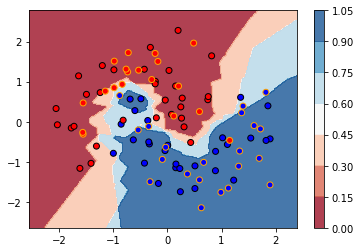

In [120]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

### E8 How well did the method do? Are there outliers in either class? Is it reasonable that this method did not predict those, given the training dataset?

In [ ]:
#Not bad but also not necessarily good. In particular there are a few red points either from the test or training data outside their area, one which is strictly in the blue shade. Those definitely appear to be outliers, and but since it occured in both the test and the training sets it may be something to look into. If the training was confused, then it makes sense that some of these could have mistakenly been identified in the testing data.

### E9 Using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

In [79]:
#Starting the process here
# get the next dataset, circles
x, y = datasets[1]

# scale the data by the mean and standard deviation, i.e. z = (x - u) / s, 
# where x is the data, u is the mean, and s is the standard deviation
# see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = StandardScaler().fit_transform(x)


Text(0.5, 1.0, 'Scaled')

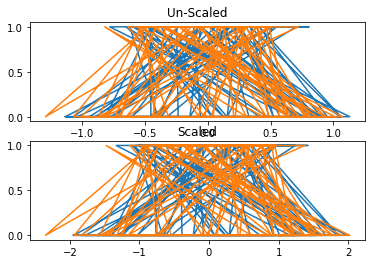

In [80]:
#The scale on the x axis changes. It's larger on the scaled data.

fig, axs = plt.subplots(2)
axs[0].plot(x, y)
axs[1].plot(X, y)
axs[0].set_title("Un-Scaled")
axs[1].set_title("Scaled")

In [81]:
# split the data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

In [82]:
y_train # color

array([1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [83]:
X_train # position

array([[ 0.33752225,  0.1972156 ],
       [ 0.26007797, -0.40692781],
       [-0.77360943, -0.21251355],
       [-0.80707957, -0.38086556],
       [-1.614901  , -0.74107291],
       [ 0.28714288,  2.0226272 ],
       [-1.58856523, -0.80311089],
       [-0.62398345, -1.93652965],
       [-1.02059109,  0.55460174],
       [ 1.21402308, -0.00750315],
       [-1.24054186,  0.93944489],
       [-1.05628487, -0.08248651],
       [ 1.3540726 , -0.76972033],
       [-1.8376991 ,  0.4438167 ],
       [-0.44228055,  0.79141975],
       [-0.40975282, -0.76573106],
       [-0.76542848, -1.28950516],
       [ 1.01551298, -0.54197248],
       [ 1.56603302, -0.68859753],
       [-0.58552875,  0.28460164],
       [-1.03332383,  0.84952455],
       [-0.65191468, -1.46468159],
       [ 0.73242037,  0.75396732],
       [ 0.08107311,  0.89980228],
       [ 1.1886501 , -0.73998096],
       [ 0.60985187,  0.23217386],
       [ 1.55395519, -1.24199011],
       [ 1.85121256, -0.004975  ],
       [-0.38448676,

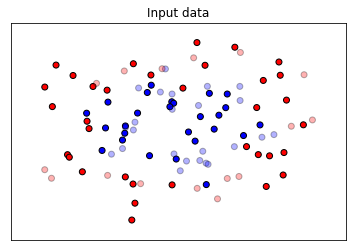

In [84]:
#Plotting
#######
# set up a meshgrid for plotting the classification result based on the size of the dataset
# note this will be used later
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#######

# counter for which subplot we are in
i = 1

# this counter is used to know when to plot the title
ds_cnt = 0

# just plot the dataset first

# note this is not used yet
cm = plt.cm.RdBu

# set the colormap used for the data 
# see https://matplotlib.org/tutorials/colors/colorbar_only.html#sphx-glr-tutorials-colors-colorbar-only-py
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1,1, i)
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# if the first row, plot the title
if ds_cnt == 0:
    ax.set_title("Input data")
    
# Plot the training points using the bright colormap
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
           edgecolors='k')

# set the limits to the colormap min max we will use later
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# get rid of ticks
ax.set_xticks(())
ax.set_yticks(())

# increment to go to the next subplot
i += 1


In [85]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[0]
clf = classifiers[0]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [86]:
name

'Nearest Neighbors'

In [87]:
clf

# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

KNeighborsClassifier(n_neighbors=3)

In [88]:
score

0.925

In [89]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

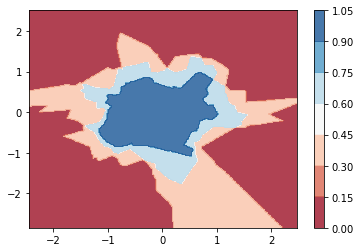

In [90]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

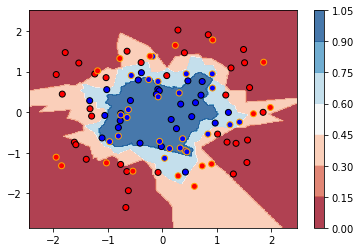

In [91]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

### E10 Again, using one of the other data sets and methods, go through the same exercise as above. Explain the basics of what your method does, and how well it works for the dataset.

In [105]:
#Linearly separate
# get the next dataset, circles
x, y = datasets[2]

# scale the data by the mean and standard deviation, i.e. z = (x - u) / s, 
# where x is the data, u is the mean, and s is the standard deviation
# see: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
X = StandardScaler().fit_transform(x)

Text(0.5, 1.0, 'Scaled')

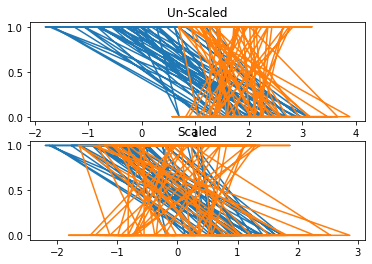

In [106]:
#The scale on the x axis changes. It's larger on the scaled data.

fig, axs = plt.subplots(2)
axs[0].plot(x, y)
axs[1].plot(X, y)
axs[0].set_title("Un-Scaled")
axs[1].set_title("Scaled")

In [107]:
# split the data into training and testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=.4, random_state=42)

In [108]:
y_train # color

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [109]:
X_train # position

array([[-1.61978158e+00,  1.29534095e+00],
       [ 1.75038375e+00, -1.62751413e-01],
       [-1.42158013e+00,  7.08778815e-01],
       [ 1.36985822e+00, -8.23005038e-01],
       [ 7.30764752e-01, -1.30848519e+00],
       [-1.10032926e+00,  2.24827938e-01],
       [ 7.36665588e-01, -9.92706447e-01],
       [-8.41330580e-01, -1.40813370e+00],
       [-1.61746142e+00, -6.39637623e-01],
       [ 3.42241493e-01, -1.81370696e+00],
       [ 1.09826685e+00,  2.86968980e+00],
       [-1.37001245e+00,  7.09447566e-01],
       [-8.15309174e-01, -2.18184983e-01],
       [ 8.62114421e-01, -1.06625993e+00],
       [ 1.24674778e+00, -7.34420290e-01],
       [-2.19997218e+00, -8.79090176e-01],
       [ 1.28873490e-01,  5.08668086e-01],
       [ 3.59093208e-01, -9.94085437e-01],
       [ 3.52462913e-01,  4.00213731e-01],
       [-1.17612194e+00,  2.30871541e-01],
       [ 6.36816878e-01, -1.05625735e-01],
       [ 2.89911028e-01,  1.26274235e+00],
       [-1.15223907e+00,  2.33158784e-01],
       [ 5.

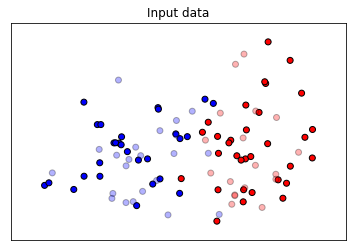

In [110]:
#Plotting
#######
# set up a meshgrid for plotting the classification result based on the size of the dataset
# note this will be used later
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
#######

# counter for which subplot we are in
i = 1

# this counter is used to know when to plot the title
ds_cnt = 0

# just plot the dataset first

# note this is not used yet
cm = plt.cm.RdBu

# set the colormap used for the data 
# see https://matplotlib.org/tutorials/colors/colorbar_only.html#sphx-glr-tutorials-colors-colorbar-only-py
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

ax = plt.subplot(1,1, i)
#ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

# if the first row, plot the title
if ds_cnt == 0:
    ax.set_title("Input data")
    
# Plot the training points using the bright colormap
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.3,
           edgecolors='k')

# set the limits to the colormap min max we will use later
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())

# get rid of ticks
ax.set_xticks(())
ax.set_yticks(())

# increment to go to the next subplot
i += 1


In [111]:
# get the first classifier, KNeighborsClassifier(3)
# here we are using 3 nearest neighbors

# index for classifier
c = 0

name = names[0]
clf = classifiers[0]

clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)


In [112]:
name

'Nearest Neighbors'

In [113]:
clf

# weights = 'uniform' here means we are not weighting by distance
# p=2 is using Euclidean (standard) distance

KNeighborsClassifier(n_neighbors=3)

In [114]:
score

0.925

In [115]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
else:
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

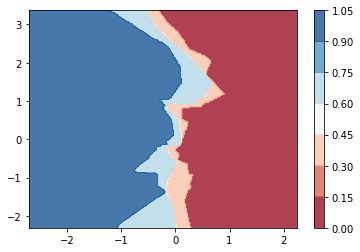

In [116]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()

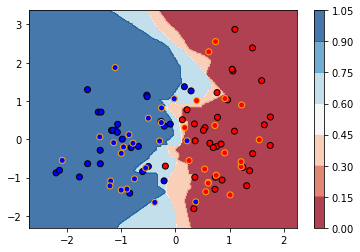

In [117]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
# note we are using the meshgrid we created before to plot this as a filled contour plot
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)
plt.colorbar()


# Plot the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')
# Plot the testing points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
           edgecolors='orange', alpha=1, zorder = 10)

## Notes on clustering vs. classification

Note that clustering is similar, but we don't have the y data, i.e. red/blue or any type of class assignemnt in the data itself, just locations in some variable space (could be lat/lon, or could be something way more abstract, like frequency vs. intensity space for sound data).

Here is a clustering example, similar to what we did above:
https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py